In [1]:
import pandas as pd
import matplotlib.pyplot as plt

from model import model_dl
from src import data_ext, data_prep
from tensorflow.python import keras

In [2]:
train_df, test_df, variable_list = data_ext.get_dataset()

## Exploratory Data Analysis

### Variables Descriptions

In [3]:
variable_list

,Var_Id,Var_Title,Var_Description,Field_Content
0,1,ID_CLIENT,Sequential number for the applicant (to be use...,"1-50000, 50001-70000, 70001-90000"
1,2,CLERK_TYPE,Not informed,C
2,3,PAYMENT_DAY,"Day of the month for bill payment, chosen by t...","1,5,10,15,20,25"
3,4,APPLICATION_SUBMISSION_TYPE,Indicates if the application was submitted via...,"Web, Carga"
4,5,QUANT_ADDITIONAL_CARDS,Quantity of additional cards asked for in the ...,"1,2,NULL"
5,6,POSTAL_ADDRESS_TYPE,Indicates if the address for posting is the ho...,1.2
6,7,SEX,NaN,"M=Male, F=Female"
7,8,MARITAL_STATUS,Encoding not informed,"1,2,3,4,5,6,7"
8,9,QUANT_DEPENDANTS,NaN,"0, 1, 2, ..."
9,10,EDUCATION_LEVEL,Edducational level in gradual order not informed,"1,2,3,4,5"


### Distribution of Target Variables

Total value count:
TARGET_LABEL_BAD=1
0    36959
1    13041
Name: count, dtype: int64
Total value percentage:
TARGET_LABEL_BAD=1
0    73.918
1    26.082
Name: proportion, dtype: float64


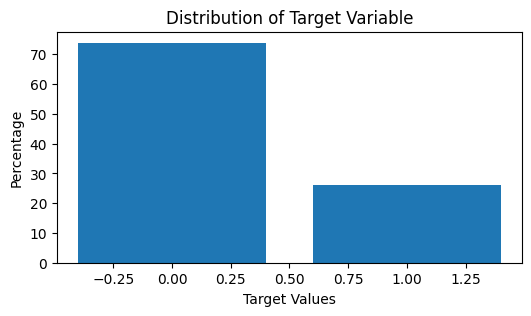

In [4]:
target=train_df['TARGET_LABEL_BAD=1']
tar_counts_val= target.value_counts()
tar_counts_per = target.value_counts(normalize=True) * 100
print("Total value count:")
print(tar_counts_val)
print("Total value percentage:")
print(tar_counts_per)

plt.figure(figsize=(6,3))
plt.bar(tar_counts_per.index, tar_counts_per.values)
plt.xlabel('Target Values')
plt.ylabel('Percentage')
plt.title('Distribution of Target Variable')
plt.show()

### Data Types

In [5]:
data_types= train_df.dtypes.value_counts()
data_types

int64      25
object     20
float64     9
Name: count, dtype: int64

### Categorical Columns (Object Type)

In [6]:
categorical_cols = train_df.select_dtypes(include='object').columns.tolist()
for cat_col in categorical_cols:
    unique_values = train_df[cat_col].nunique()
    print("{}: {}".format(cat_col, unique_values))

CLERK_TYPE: 1
APPLICATION_SUBMISSION_TYPE: 3
SEX: 4
STATE_OF_BIRTH: 29
CITY_OF_BIRTH: 9910
RESIDENCIAL_STATE: 27
RESIDENCIAL_CITY: 3529
RESIDENCIAL_BOROUGH: 14511
FLAG_RESIDENCIAL_PHONE: 2
RESIDENCIAL_PHONE_AREA_CODE: 102
FLAG_MOBILE_PHONE: 1
COMPANY: 2
PROFESSIONAL_STATE: 28
PROFESSIONAL_CITY: 2236
PROFESSIONAL_BOROUGH: 5057
FLAG_PROFESSIONAL_PHONE: 2
PROFESSIONAL_PHONE_AREA_CODE: 87
FLAG_ACSP_RECORD: 1
RESIDENCIAL_ZIP_3: 794
PROFESSIONAL_ZIP_3: 794


### Missing Data

In [7]:
total_missing = train_df.isna().sum()
percent_missing = (total_missing / len(train_df)) * 100
missing_data = pd.concat([total_missing, percent_missing], axis=1, keys=['Total', 'Percent Missing'])
missing_data = missing_data[missing_data['Percent Missing']>0].sort_values('Percent Missing', ascending=False)
missing_data

,Total,Percent Missing
PROFESSIONAL_CITY,33783,67.566
PROFESSIONAL_BOROUGH,33783,67.566
MATE_EDUCATION_LEVEL,32338,64.676
MATE_PROFESSION_CODE,28884,57.768
PROFESSION_CODE,7756,15.512
OCCUPATION_TYPE,7313,14.626
MONTHS_IN_RESIDENCE,3777,7.554
RESIDENCE_TYPE,1349,2.698


In [8]:
cols_to_drop=['MATE_EDUCATION_LEVEL','MATE_PROFESSION_CODE','CLERK_TYPE','FLAG_MOBILE_PHONE','FLAG_ACSP_RECORD']
train_df['SEX'] = train_df['SEX'].replace(' ', 'F')
train_df['APPLICATION_SUBMISSION_TYPE'] = train_df['APPLICATION_SUBMISSION_TYPE'].replace('0', 'Web')
train_df=train_df.drop(cols_to_drop,axis=1)
test_df=test_df.drop(cols_to_drop,axis=1)

### Occupation Type

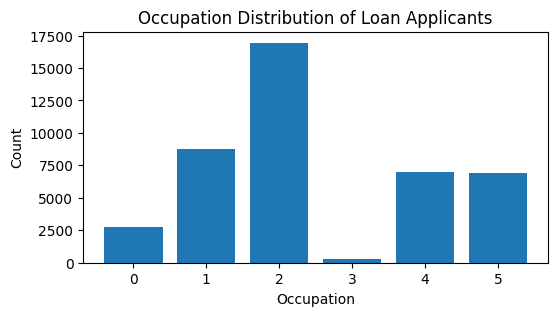

In [9]:
occupations = train_df['OCCUPATION_TYPE']
oc_counts = occupations.value_counts()
plt.figure(figsize=(6,3))
plt.bar(oc_counts.index, oc_counts)
plt.title('Occupation Distribution of Loan Applicants')
plt.xlabel('Occupation')
plt.ylabel('Count')
plt.show()

### Marital Status

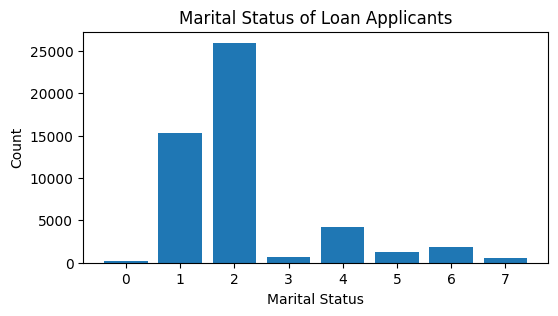

In [10]:
marital_status = train_df['MARITAL_STATUS']
ms_count=marital_status.value_counts()
plt.figure(figsize=(6,3))
plt.bar(ms_count.index, ms_count)
plt.title('Marital Status of Loan Applicants')
plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.show()

## Preprocessing

In [11]:
X_train, y_train, X_test, y_test= data_ext.get_features(train_df, test_df)

In [12]:
X_train, X_val, y_train, y_val = data_ext.get_train_val(X_train, y_train)

In [13]:
train_data, val_data, test_data = data_prep.preprocess_data(X_train, X_val, X_test)

## Modeling

In [14]:
model1 = model_dl.deepl_model(input_shape=(train_data.shape))

# Compile the model
model1.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model1.fit(train_data, y_train, batch_size=32, epochs=10, validation_data=(val_data, y_val))

# Evaluate the model on test data
loss, accuracy = model1.evaluate(test_data, y_test)
print('Test loss:', loss)
print('Test accuracy:', accuracy)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                2496      
_________________________________________________________________
dense_1 (Dense)              (None, 128)               8320      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 129       
Total params: 10,945
Trainable params: 10,945
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/10
1094/1094 [==============================] - 5s 3ms/step - loss: 0.5663 - accuracy: 0.7391 - val_loss: 0.5648 - val_accuracy: 0.7384
Epoch 2/10
1094/1094 [==============================] - 3s 3ms/step - loss: 0.5618 - accuracy: 0.7394 - val_loss: 0.5608 - val_accuracy: 0.7385
Epoch 3/10
1094/1094 [==============================] - 2s 2ms/step - loss: 0.5599 - accu

## Predict Unlabeled Data

In [15]:
import numpy as np

predictions = model1.predict(test_data)
#rounded_predictions = np.round(predictions).astype(int)
test_df["TARGET_LABEL_BAD=1"] = predictions
test_df[["ID_CLIENT","TARGET_LABEL_BAD=1"]]

,ID_CLIENT,TARGET_LABEL_BAD=1
0,70001,0.277807
1,70002,0.268503
2,70003,0.271696
3,70004,0.227711
4,70005,0.255495
...,...,...
19995,89996,0.285252
19996,89997,0.314668
19997,89998,0.376672
19998,89999,0.174890
